In [1]:
# Installation des modules et import des librairies nécessaires

!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install topojson
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 761.6 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 2.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 706.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 1.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 32.1 MB/s eta 0:00:

In [2]:
# Import des données géographiques des arrondissements parisiens depuis la librairie cartiflette

import cartiflette.s3 as s3

Arrondissements = s3.download_vectorfile_url_all(
    crs = 4326,
    values = ["75"],
    borders="COMMUNE_ARRONDISSEMENT",
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 40.1kiB [00:00, 17.8MiB/s]


0     6,58
1     6,23
2     7,65
3     6,09
4     8,32
5     7,65
6     7,30
7     7,76
8     7,25
9     5,10
10    6,87
11    7,48
12    6,58
13    6,23
14    7,49
15    7,38
16    7,18
17    5,16
18    6,16
19    6,45
Name: Note Globale, dtype: object

In [29]:
# On conserve uniquement les colonnes nécessaires et tri des arrondissement dans l'ordre. 

Arrondissements = Arrondissements[['NOM','geometry', 'INSEE_COG']].sort_values('INSEE_COG')


# Ajout des notes globales des habitants.

notes = pd.read_excel("/home/onyxia/Projet_Python_2AENSAE/Notes_arrondissements.xlsx",  decimal=',')
notes_globales = notes['Note Globale'].values
Arrondissements['Note globale'] = notes_globales

In [30]:
display(Arrondissements)

,NOM,geometry,INSEE_COG,Note globale
0,Paris 1er Arrondissement,"POLYGON ((2.34464 48.85409, 2.34411 48.85428, ...",75101,6.58
1,Paris 2e Arrondissement,"POLYGON ((2.34792 48.87069, 2.34827 48.87062, ...",75102,6.23
2,Paris 3e Arrondissement,"POLYGON ((2.35016 48.86199, 2.35019 48.86203, ...",75103,7.65
3,Paris 4e Arrondissement,"POLYGON ((2.36849 48.85580, 2.36873 48.85482, ...",75104,6.09
4,Paris 5e Arrondissement,"POLYGON ((2.33666 48.83967, 2.33672 48.84011, ...",75105,8.32
5,Paris 6e Arrondissement,"POLYGON ((2.33292 48.85934, 2.33339 48.85924, ...",75106,7.65
6,Paris 7e Arrondissement,"POLYGON ((2.31671 48.84686, 2.31638 48.84677, ...",75107,7.30
7,Paris 8e Arrondissement,"POLYGON ((2.32717 48.88346, 2.32716 48.88323, ...",75108,7.76
8,Paris 9e Arrondissement,"POLYGON ((2.32589 48.86958, 2.32597 48.87009, ...",75109,7.25
9,Paris 10e Arrondissement,"POLYGON ((2.36471 48.88437, 2.36527 48.88433, ...",75110,5.10


/opt/mamba/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

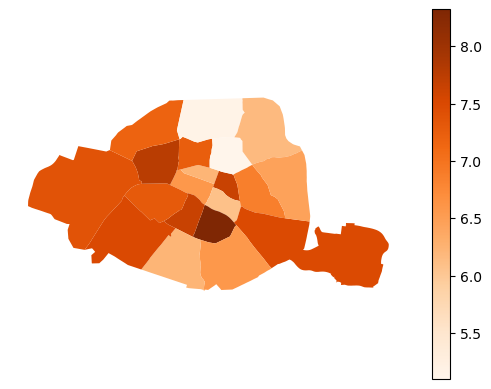

In [31]:
aplat = Arrondissements.plot(
    column = "Note globale", cmap="Oranges", legend=True)
aplat.set_axis_off()
aplat